In [1]:
import numpy as np
import scipy.io

import matplotlib.pyplot as plt
import seaborn as sns
% matplotlib notebook

# Forward propagation of a neural netowork with predefined optimal weights.

This is an exercise on proper deployment of forward propagation with a neural network. The optimal parameters have already been learned and are being supplied in order to make predictions.

In [2]:
mat = scipy.io.loadmat('ex3data1.mat')

In [3]:
# X is a 5000 x 400 matrix. Each row is an "unrolled" 20 x 20 pixel image of a digit
# using numbers to expresses the image's greyscale value at that pixel. 

X = mat['X']

# y is a 5000 x 1 vector containing the correct label for each example in the training set.
# the number 0 is given the label 10 in this data.

y = mat['y']

y = y.ravel()

In [4]:
def sigmoid(z):
    
    # Maps the input to a range from 0 - 1 
    
    return 1/(1+np.exp(np.negative(z)))  

In [5]:
def add_x_feature(X):
    
    # Adds a feature of value 1 for each example in X to account for the intercept/bias unit.
    
    m,n = np.shape(X)
    X_0 = np.ones(len(X)).reshape(m,1)
    
    return np.append(X_0,X, 1)

In [6]:
def display_data(X):
    
    # Allows us to visualize the features of X for 25 randomly selected examples.
    
    from scipy import ndimage
    
    rand_ind = np.random.randint(0,5000,25)
    X_sample = X[rand_ind, :]

    fig, axs = plt.subplots(5, 5)
    plt.tight_layout(pad=0.001, h_pad=None, w_pad=None)
    i = 0

    for ax in axs.reshape(-1):

        num = X_sample[i,:]
        num_mat = num.reshape(20, 20)
        rotated_num = scipy.ndimage.rotate(num_mat, 90)
        
        ax.imshow(rotated_num, cmap = 'gray', origin = 'lower')
        ax.grid(False)
        ax.set_yticklabels([])
        ax.set_xticklabels([])
        i += 1

<IPython.core.display.Javascript object>


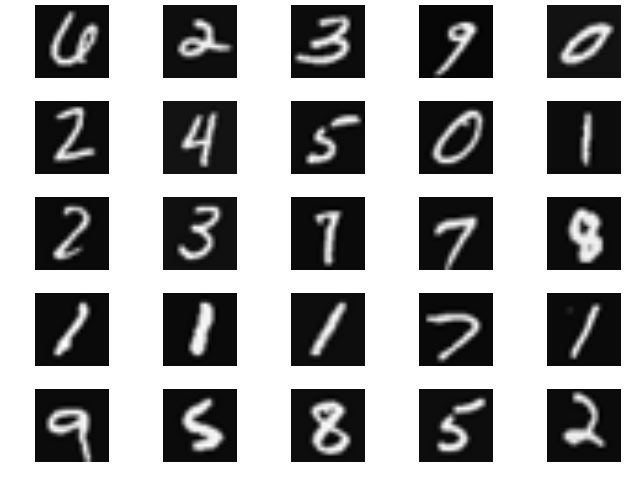

In [7]:
display_data(X)

In [8]:
weights = scipy.io.loadmat('ex3weights.mat')

In [9]:
# Optimal theta matrices.

theta1 = weights['Theta1']
theta2 = weights['Theta2']

In [10]:
def predict_NN(theta1, theta2, X, y):
    
    # Returns predictions of NN forward propagation using a sigmoid activation function.
    # Hidden layer size: 25 units
    # Output layer size: 10 units (1 per class)
    
    X_new = add_x_feature(X)
    a2 = sigmoid(theta1.dot(X_new.T))
    
    a2 = add_x_feature(a2.T).T
    a3 = sigmoid(theta2.dot(a2))
    
    predictions = np.argmax(a3, axis = 0) + 1
    accuracy =  np.mean((predictions == y) * 1)
    
    return 'Training accuracy for neural network: {:0.2f}%'.format(accuracy * 100)

In [11]:
predict_NN(theta1, theta2, X, y)

'Training accuracy for neural network: 97.52%'